### I. Importing essential libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


### II. Importing and understanding our dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### III. Data analysis

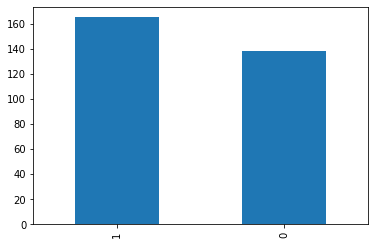

In [73]:
df.target.value_counts().plot(kind="bar");

In [74]:
print("Percentage of patience without heart problems: "+str(round(df.target.value_counts()[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(df.target.value_counts()[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


#### Checking for null values

In [75]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [76]:
categorical_val = []
continous_val = []
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
    print('--------------------------------')    

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------------------
sex : [1 0]
--------------------------------
cp : [3 2 1 0]
--------------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 

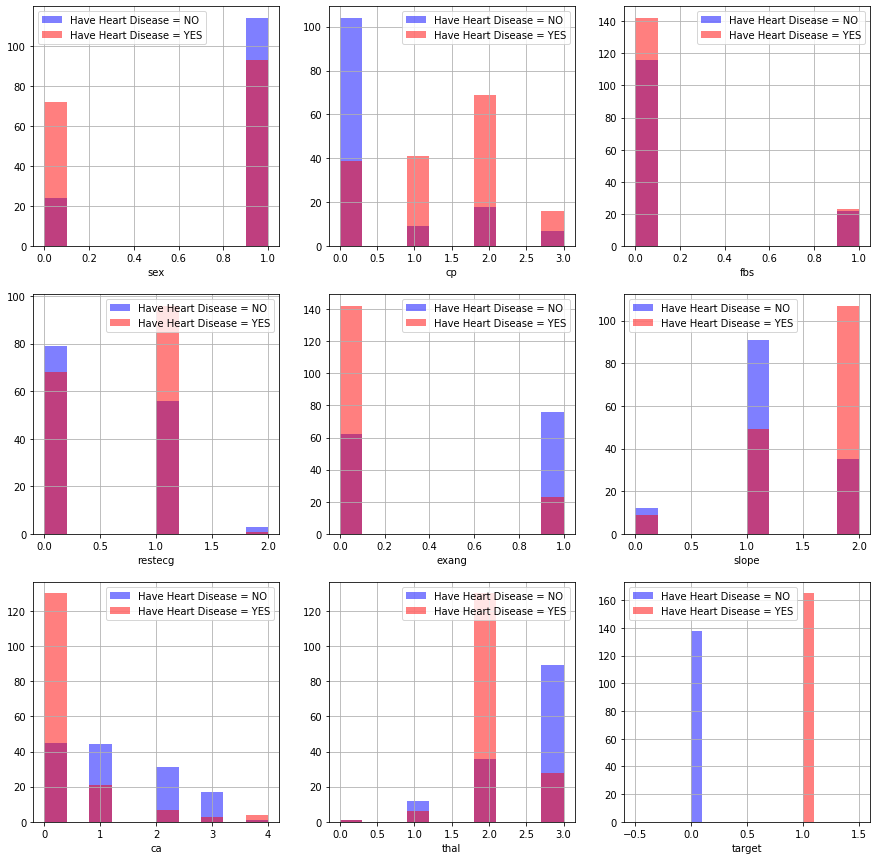

In [77]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(color='blue', label='Have Heart Disease = NO', alpha=0.5)
    df[df["target"] == 1][column].hist(color='red', label='Have Heart Disease = YES', alpha=0.5)
    plt.legend()
    plt.xlabel(column)

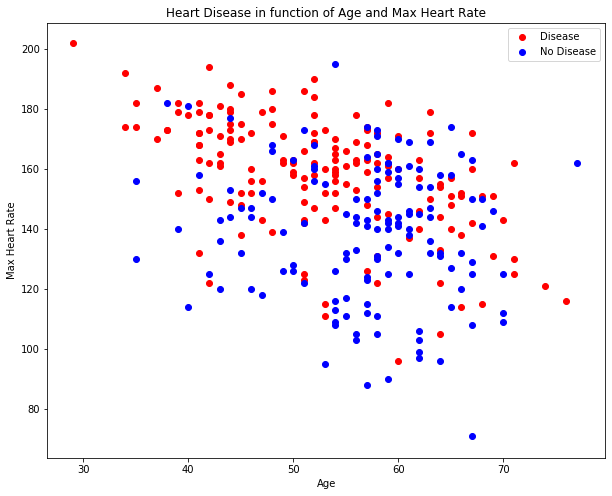

In [78]:
# Plotting another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

# Adding title
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### IV. Train Test split

In [89]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_train.shape

(242, 13)

In [81]:
X_test.shape

(91, 13)

In [82]:
Y_train.shape

(212,)

In [83]:
Y_test.shape

(91,)

### V. Model Fitting

In [84]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

score = lr_clf.score(X_test, y_test)
print(score)

Train Result:

Accuracy Score: 85.12%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.876289    0.834483   0.85124    0.855386      0.853313
recall       0.779817    0.909774   0.85124    0.844795      0.851240
f1-score     0.825243    0.870504   0.85124    0.847873      0.850117
support    109.000000  133.000000   0.85124  242.000000    242.000000
Confusion Matrix: 
 [[ 85  24]
 [ 12 121]]

Test Result:

Accuracy Score: 86.89%
CLASSIFICATION REPORT:
                   0       1  accuracy  macro avg  weighted avg
precision   0.862069   0.875  0.868852   0.868534      0.868852
recall      0.862069   0.875  0.868852   0.868534      0.868852
f1-score    0.862069   0.875  0.868852   0.868534      0.868852
support    29.000000  32.000  0.868852  61.000000     61.000000
Confusion Matrix: 
 [[25  4]
 [ 4 28]]

0.8688524590163934


In [99]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.123967,86.885246


### Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)

In [102]:
Y_pred_nb.shape


(61,)

In [104]:
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 86.89 %
